# Comparing age sources

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apogee_sample import APOGEESample

In [2]:
sample = APOGEESample.load()
sample()

,APOGEE_ID,RA,DEC,GALR,GALPHI,GALZ,SNREV,TEFF,TEFF_ERR,LOGG,...,C_N,C_N_ERR,CN_AGE,CN_AGE_ERR,CN_LOG_AGE,CN_LOG_AGE_ERR,L23_AGE,L23_AGE_ERR,L23_LOG_AGE,L23_LOG_AGE_ERR
0,2M00000068+5710233,0.002850,57.173164,8.458404,175.658285,-0.040749,282.74594,5031.2637,10.145057,3.456132,...,-0.109907,0.024025,NaN,NaN,NaN,NaN,3.713866,1.315107,0.569826,0.138561
1,2M00000133+5721163,0.005558,57.354549,11.953869,153.654715,-0.470835,120.29548,4974.6010,15.310856,2.388251,...,-0.312257,0.042614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2M00000211+6327470,0.008802,63.463078,12.858291,151.396933,0.169356,169.02042,4681.4634,8.766338,2.245527,...,-0.526230,0.020749,1.090850,1.64,0.037765,0.652925,NaN,NaN,NaN,NaN
3,2M00000222+5625359,0.009287,56.426662,9.217623,168.311742,-0.185231,129.40749,5049.7686,14.194268,3.291666,...,-0.133700,0.032615,NaN,NaN,NaN,NaN,1.241603,0.066435,0.093983,0.031293
4,2M00000446+5854329,0.018603,58.909149,10.505168,160.196856,-0.203834,144.98238,4766.6274,10.474075,2.420902,...,-0.310579,0.024317,3.529399,1.64,0.547701,0.201803,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171630,2M23595669+6131251,359.986225,61.523659,9.939371,163.650440,-0.015894,154.12479,5008.3950,13.106046,2.480740,...,-0.333050,0.034828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171631,2M23595676+7918072,359.986523,79.302002,9.415115,168.484293,0.676923,446.47790,4311.3926,6.555767,1.731429,...,-0.057909,0.020354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171632,2M23595837+5700444,359.993224,57.012356,10.694221,159.021606,-0.358826,101.53675,4954.1700,15.750314,2.474665,...,-0.344606,0.040020,2.638397,1.64,0.421340,0.269953,NaN,NaN,NaN,NaN
171633,2M23595886+5726058,359.995265,57.434956,9.328103,167.511337,-0.163006,232.91826,4859.9087,9.050734,2.480687,...,-0.262194,0.022607,4.011387,1.64,0.603295,0.177555,NaN,NaN,NaN,NaN


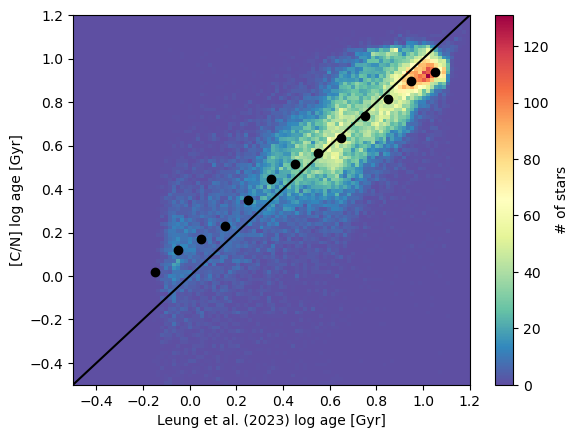

In [3]:
data = sample.data[pd.notna(sample.data['L23_AGE']) & pd.notna(sample.data['CN_AGE'])]

fig, ax = plt.subplots()
h, xedges, yedges, im = ax.hist2d(
    data['L23_LOG_AGE'], data['CN_LOG_AGE'], range=[[-0.5, 1.2], [-0.5, 1.2]], 
    bins=100, cmap='Spectral_r', #norm='log'
)
log_age_bins = np.arange(-0.5, 1.2, 0.1)
log_cn_age_medians = sample.binned_intervals(
    'CN_LOG_AGE', 'L23_LOG_AGE', log_age_bins, quantiles=[0.5]
)[0.5]
ax.plot(log_age_bins[:-1] + 0.05, log_cn_age_medians, 'ko')
fig.colorbar(im, ax=ax, label='# of stars')
ax.plot([-1, 2], [-1, 2], 'k-')
ax.set_xlabel('Leung et al. (2023) log age [Gyr]')
ax.set_ylabel('[C/N] log age [Gyr]')
plt.show()

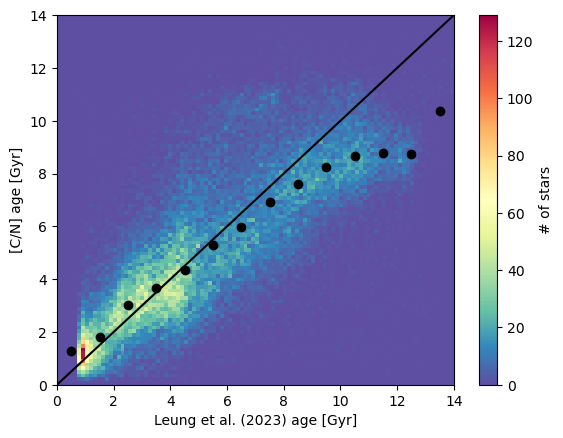

In [4]:
fig, ax = plt.subplots()
h, xedges, yedges, im = ax.hist2d(
    data['L23_AGE'], data['CN_AGE'], range=[[0, 14], [0, 14]], bins=100, 
    cmap='Spectral_r', #norm='log'
)
fig.colorbar(im, ax=ax, label='# of stars')
age_bins = np.arange(0, 15, 1)
cn_age_medians = sample.binned_intervals(
    'CN_AGE', 'L23_AGE', age_bins, quantiles=[0.5]
)[0.5]
ax.plot(age_bins[:-1] + 0.5, cn_age_medians, 'ko')
ax.plot([0, 14], [0, 14], 'k-')
ax.set_xlabel('Leung et al. (2023) age [Gyr]')
ax.set_ylabel('[C/N] age [Gyr]')
plt.show()

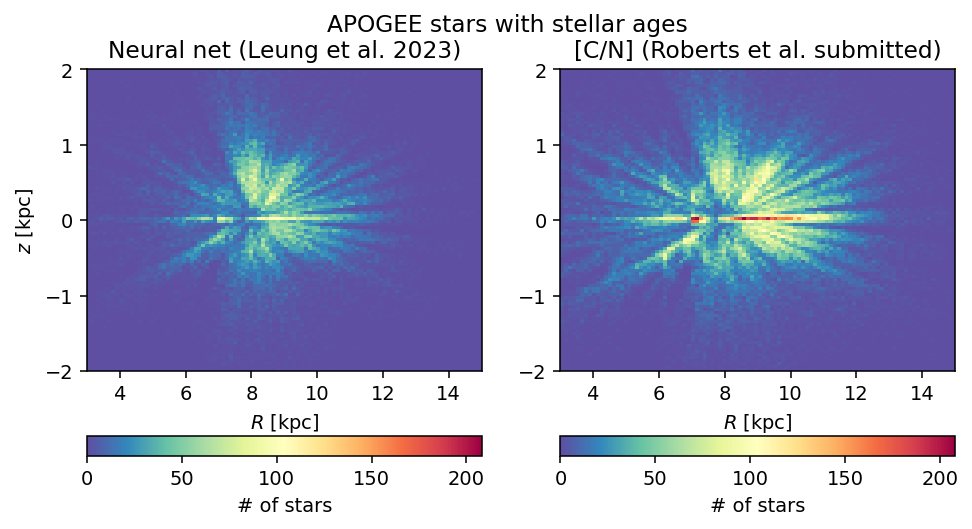

In [10]:
extent = [[3, 15], [-2, 2]]
cmap = 'Spectral_r'
bins = 100
fig, axs = plt.subplots(1, 2, figsize=(8, 4), dpi=140)
has_cn_age = sample.data[pd.notna(sample.data['CN_AGE'])]
h, xedges, yedges, im1 = axs[1].hist2d(
    has_cn_age['GALR'], has_cn_age['GALZ'], 
    range=extent, bins=bins, cmap=cmap, #norm='log',
)
fig.colorbar(im1, ax=axs[1], label='# of stars', orientation='horizontal')
axs[1].set_title('[C/N] (Roberts et al. submitted)')
has_nn_age = sample.data[pd.notna(sample.data['L23_AGE'])]
h, xedges, yedges, im0 = axs[0].hist2d(
    has_nn_age['GALR'], has_nn_age['GALZ'], 
    range=extent, bins=bins, cmap=cmap, norm=im1.norm,
)
fig.colorbar(im0, ax=axs[0], label='# of stars', orientation='horizontal')
axs[0].set_title('Neural net (Leung et al. 2023)')
axs[0].set_xlabel(r'$R$ [kpc]')
axs[1].set_xlabel(r'$R$ [kpc]')
axs[0].set_ylabel(r'$z$ [kpc]')
fig.suptitle('APOGEE stars with stellar ages')
plt.show()

## Age errors

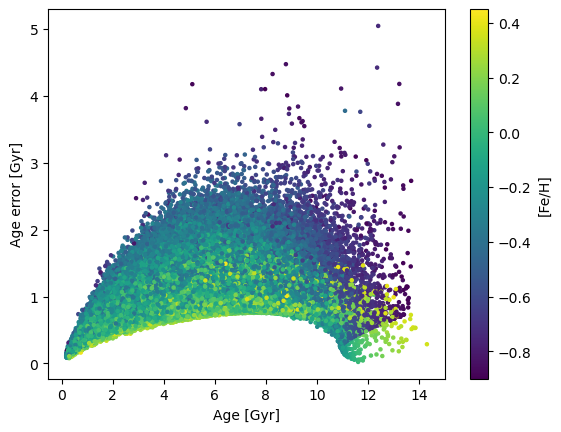

In [7]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_AGE'), sample('CN_AGE_ERR'), s=5, c=sample('FE_H'))
fig.colorbar(pc, ax=ax, label='[Fe/H]')
# ax.set_ylim((0, 5))
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Age error [Gyr]')
plt.show()

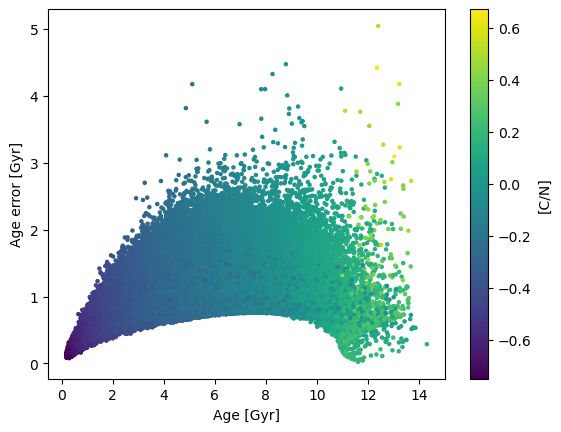

In [8]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_AGE'), sample('CN_AGE_ERR'), s=5, c=sample('C_N'))
fig.colorbar(pc, ax=ax, label='[C/N]')
# ax.set_ylim((0, 5))
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('Age error [Gyr]')
plt.show()

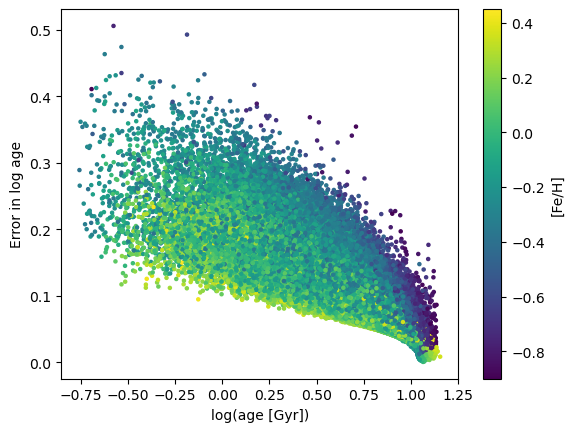

In [9]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_LOG_AGE'), sample('CN_LOG_AGE_ERR'), s=5, c=sample('FE_H'))
fig.colorbar(pc, ax=ax, label='[Fe/H]')
# ax.set_ylim((0, 5))
ax.set_xlabel('log(age [Gyr])')
ax.set_ylabel('Error in log age')
plt.show()

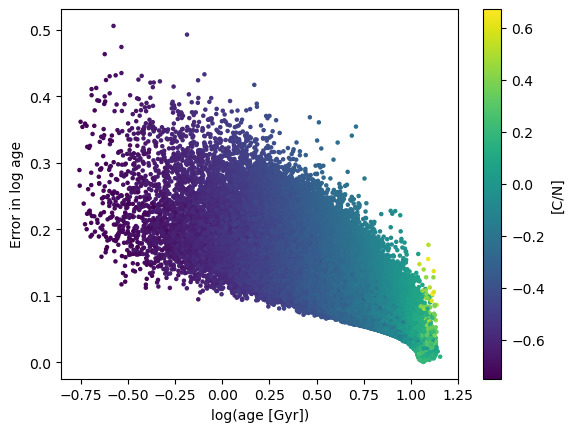

In [10]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_LOG_AGE'), sample('CN_LOG_AGE_ERR'), s=5, c=sample('C_N'))
fig.colorbar(pc, ax=ax, label='[C/N]')
# ax.set_ylim((0, 5))
ax.set_xlabel('log(age [Gyr])')
ax.set_ylabel('Error in log age')
plt.show()

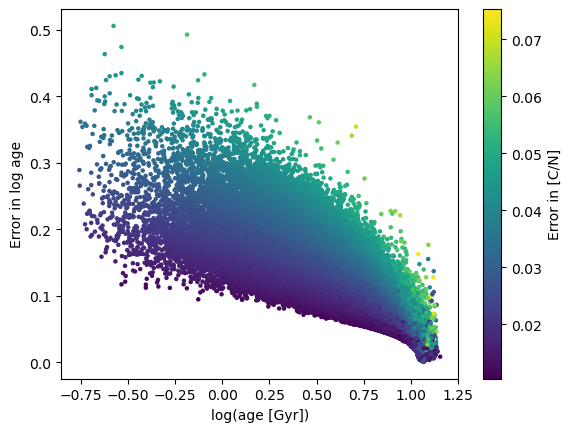

In [11]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('CN_LOG_AGE'), sample('CN_LOG_AGE_ERR'), s=5, c=sample('C_N_ERR'))
fig.colorbar(pc, ax=ax, label='Error in [C/N]')
# ax.set_ylim((0, 5))
ax.set_xlabel('log(age [Gyr])')
ax.set_ylabel('Error in log age')
plt.show()

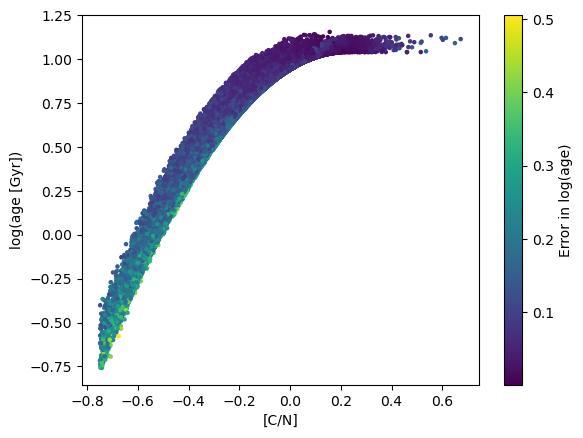

In [12]:
fig, ax = plt.subplots()
pc = ax.scatter(sample('C_N'), sample('CN_LOG_AGE'), s=5, c=sample('CN_LOG_AGE_ERR'))
fig.colorbar(pc, ax=ax, label='Error in log(age)')
# ax.set_ylim((0, 5))
ax.set_xlabel('[C/N]')
ax.set_ylabel('log(age [Gyr])')
plt.show()

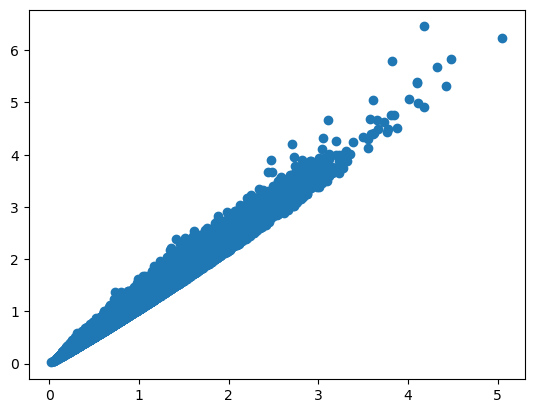

In [13]:
plt.scatter(
    sample('CN_AGE_ERR'), 
    10 ** (sample('CN_LOG_AGE') + sample('CN_LOG_AGE_ERR')) - 10**(sample('CN_LOG_AGE'))
)

Text(0, 0.5, 'Error in linear age')

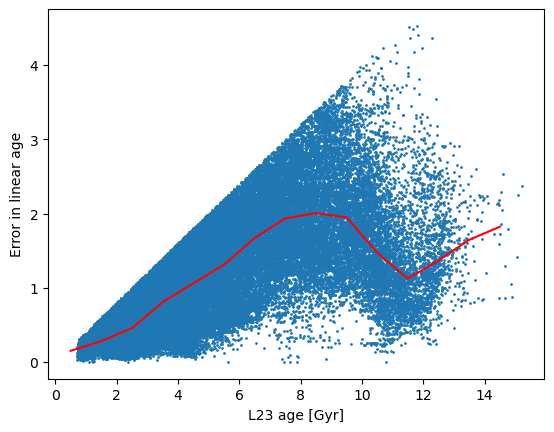

In [22]:
plt.scatter(sample.data['L23_AGE'], sample.data['L23_AGE_ERR'], s=1)
medians = []
for i in range(15):
    age_lim = (i, i+1)
    mono_age = sample.filter({'L23_AGE': age_lim})
    medians.append(mono_age('L23_AGE_ERR').median())
plt.plot(np.arange(0.5, 15, 1), medians, 'r-')
plt.xlabel('L23 age [Gyr]')
plt.ylabel('Error in linear age')

0.100301975


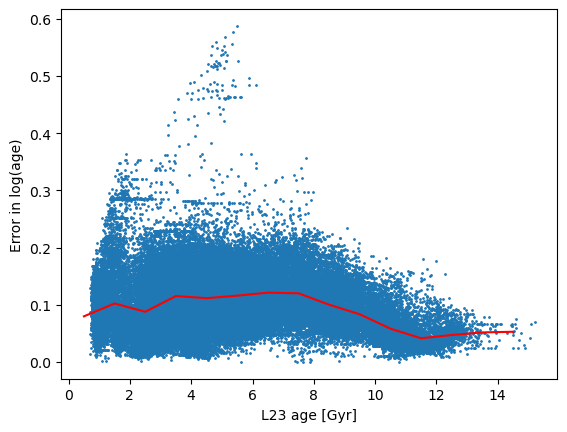

In [23]:
plt.scatter(sample.data['L23_AGE'], sample.data['L23_LOG_AGE_ERR'], s=1)
medians = []
for i in range(15):
    age_lim = (i, i+1)
    mono_age = sample.filter({'L23_AGE': age_lim})
    medians.append(mono_age('L23_LOG_AGE_ERR').median())
plt.plot(np.arange(0.5, 15, 1), medians, 'r-')
plt.xlabel('L23 age [Gyr]')
plt.ylabel('Error in log(age)')
print(sample('L23_LOG_AGE_ERR').median())